In [34]:
import cv2
import numpy as np
import data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [35]:
dataset = data.datasets.myDataset(base_dir=r"E:\ImageRegistration\my_pipeline\data\datasets\ACDC", split="train")
dataloader = DataLoader(dataset=dataset)

it = iter(dataloader)
for i in range(10):
    next(it)

element = next(it)
print(element.keys())

Number of image pairs in train: 951
dict_keys(['X_image', 'Y_image', 'X_seg', 'Y_seg'])


In [36]:
X_image = element["X_image"].squeeze().numpy()
Y_image = element["Y_image"].squeeze().numpy()
X_seg = element["X_seg"].squeeze().numpy()
Y_seg = element["Y_seg"].squeeze().numpy()

在OpenCV4.4.0及以上版本中调用cv2.xfeatures2d.SIFT_create()，会提示没有方法。这是因为SIFT的专利已于 2020 年 3 月 6 日到期。现在可以在OpenCV的免费库中调用。OpenCV 的分布式构建现在包含自 4.4.0 版以来的 SIFT，可通过 Python 中的 cv2.SIFT_create() 访问。

In [37]:
cv2.__version__ 

'4.5.5'

In [38]:
sift = cv2.SIFT_create()

In [39]:
# 不需要归一化后的图像
X_image = X_image*255
Y_image = Y_image*255
X_image = X_image.astype(np.uint8)
Y_image = Y_image.astype(np.uint8)

In [40]:

kp1, des1 = sift.detectAndCompute(X_image, None)
kp2, des2 = sift.detectAndCompute(Y_image, None)
# kp保存的特征点对象，des是特征向量？

In [41]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [42]:
# good = []
# for m, n in matches:
#     if m.distance < 0.75* n.distance:
#         good.append([m])

good = matches

In [43]:
img = cv2.drawMatchesKnn(X_image, kp1, Y_image, kp2, good[:20], None, flags=2)

# cv2.imshow('img', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

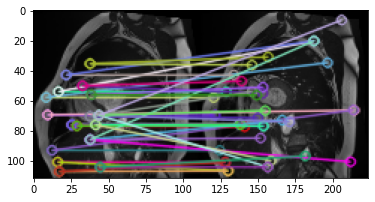

In [44]:

plt.imshow(img)
plt.show()